<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Data-Source" data-toc-modified-id="The-Data-Source-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Data Source</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Explanatory-Data-Analysis" data-toc-modified-id="Explanatory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explanatory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Loan-Status" data-toc-modified-id="Loan-Status-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Loan Status</a></span></li><li><span><a href="#Annual-Income" data-toc-modified-id="Annual-Income-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Annual Income</a></span></li><li><span><a href="#Funded-Amount" data-toc-modified-id="Funded-Amount-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Funded Amount</a></span></li><li><span><a href="#Grade" data-toc-modified-id="Grade-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Grade</a></span></li><li><span><a href="#Interest-Rate" data-toc-modified-id="Interest-Rate-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Interest Rate</a></span></li><li><span><a href="#Employment-History" data-toc-modified-id="Employment-History-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Employment History</a></span></li><li><span><a href="#Term" data-toc-modified-id="Term-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Term</a></span></li><li><span><a href="#Home-Ownership" data-toc-modified-id="Home-Ownership-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Home Ownership</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Purpose</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Set-up-modeling" data-toc-modified-id="Set-up-modeling-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Set up modeling</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#KNeighbors" data-toc-modified-id="KNeighbors-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>KNeighbors</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Ada-Boost" data-toc-modified-id="Ada-Boost-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Ada Boost</a></span></li></ul></li><li><span><a href="#Imbalance-SMOTE" data-toc-modified-id="Imbalance-SMOTE-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Imbalance SMOTE</a></span></li></ul></div>

## The Data Source

Source: https://www.lendingclub.com/info/download-data.action

Lending Club is a peer-to-peer lending company with its headquarters in San Francisco, California.  It began by operating as an online consumer-lending platform that enables borrowers to obtain an unsecured loan that's funded by investors.  Investors are able to search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from the interest on these loans. The loans can only be chosen at the interest rates assigned by Lending Club, but investors could decide how much to fund each borrower, with a minimum investment of $25.  Investors make money from the interest.  Lending Club makes money by charging borrowers an origination fee and investors a service fee.


The data from LendingClub is from 2007 to 2018Q4.  It was downloaded and saved to a CSV.  We selected the features to use on this project and created a new CSV. 

## Problem Statement
The goal, using Machine Learning models and some of the features in the data set, is to determine if a borrower will  default on their loan.

What is default?  According to dictionary.com, defaulting on a loan happens when a borrower fails "to pay back a debt according to the initial arrangement with the institution". At Lending Club, after 120 days, a loan goes into default.

In [1]:
#import libraries
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import re
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
#import the data
loan2 = pd.read_csv('./LoanStats/loans_with_date.csv', low_memory=False)

There are 149 features in this data set. We streamlined the features to those important for this analysis and created a new data set.

Some of the features we chose for this project are income, employment, home ownership status and interest rate.

Many of the features that were eliminated from the data set.  For example, loan description and title are the same as purpose of the loan.

|LoanStat||Description|
|:-:||:-:|
|annual_inc||Annual income: annual income provided by the borrower during registration|
|emp_length||Employment length: in years. All values are between 0 and 10 where 0 means less than one year and 10 means ten or more years|
|funded_amnt||Funded amount: The total amount of the loan|
|grade||Lending Club uses a system where "A" is the best grade and "G" the worst.|
|home_ownership||The home ownership status provided by the borrower |
|installment||Installment: is the monthly payment owed by the borrower|
|int_rate||Interest rate on the loan|
|loan_amnt||Loan amount: The amount of the loan applied for by the borrower. If the credit department reduces the loan amount, then it will be reflected in this value|
|loan_status||Current status of the loan|
|purpose||It is  provided by the borrower for the loan request|
|term||The number of payments on the loan. Values are in months and can be either 36 or 60|
|total_pymnt||Total payments: Payments received to date for total amount funded|

## Data Cleaning

In this section, we will examine our data and familiarize ourselves with it.  We will identify and remove missing and duplicate values from our large data set. This is an important step because it will impact the score.  

In [3]:
# print the first (5) rows and examine and evaluate them 
# check if there are enough observations to accurately predict an outcome
print(f' The shape of the data is {loan2.shape}')
loan2.head()

 The shape of the data is (2260701, 17)


,Unnamed: 0,funded_amnt,emp_length,annual_inc,loan_status,loan_amnt,home_ownership,int_rate,addr_state,grade,term,installment,total_pymnt,issue_d,purpose,dti,zip_code
0,0,3600.0,10+ years,55000.0,Fully Paid,3600.0,MORTGAGE,13.99,PA,C,36 months,123.03,4421.723917,Dec-2015,debt_consolidation,5.91,190xx
1,1,24700.0,10+ years,65000.0,Fully Paid,24700.0,MORTGAGE,11.99,SD,C,36 months,820.28,25679.660000,Dec-2015,small_business,16.06,577xx
2,2,20000.0,10+ years,63000.0,Fully Paid,20000.0,MORTGAGE,10.78,IL,B,60 months,432.66,22705.924294,Dec-2015,home_improvement,10.78,605xx
3,3,35000.0,10+ years,110000.0,Current,35000.0,MORTGAGE,14.85,NJ,C,60 months,829.90,31464.010000,Dec-2015,debt_consolidation,17.06,076xx
4,4,10400.0,3 years,104433.0,Fully Paid,10400.0,MORTGAGE,22.45,PA,F,60 months,289.91,11740.500000,Dec-2015,major_purchase,25.37,174xx


In [4]:
# removed the Unnamed Column
loan2.drop(columns=['Unnamed: 0'], inplace=True)

An 'object' data type stores mixed data types. Throughout our EDA (next section), they will be converted to floating point numbers because some machine learning models cannot work with them.

In [5]:
# a list of the features' data types
loan2.dtypes

funded_amnt       float64
emp_length         object
annual_inc        float64
loan_status        object
loan_amnt         float64
home_ownership     object
int_rate          float64
addr_state         object
grade              object
term               object
installment       float64
total_pymnt       float64
issue_d            object
purpose            object
dti               float64
zip_code           object
dtype: object

Next, we will identify and remove missing values and duplicate observations from our large data set.

In [6]:
# detect the number of missing values in each feature.   
loan2.isnull().sum()

funded_amnt           33
emp_length        146940
annual_inc            37
loan_status           33
loan_amnt             33
home_ownership        33
int_rate              33
addr_state            33
grade                 33
term                  33
installment           33
total_pymnt           33
issue_d               33
purpose               33
dti                 1744
zip_code              34
dtype: int64

In [7]:
# check for duplicate rows.  (32) duplicates were removed.
loan2.drop_duplicates()

,funded_amnt,emp_length,annual_inc,loan_status,loan_amnt,home_ownership,int_rate,addr_state,grade,term,installment,total_pymnt,issue_d,purpose,dti,zip_code
0,3600.0,10+ years,55000.0,Fully Paid,3600.0,MORTGAGE,13.99,PA,C,36 months,123.03,4421.723917,Dec-2015,debt_consolidation,5.91,190xx
1,24700.0,10+ years,65000.0,Fully Paid,24700.0,MORTGAGE,11.99,SD,C,36 months,820.28,25679.660000,Dec-2015,small_business,16.06,577xx
2,20000.0,10+ years,63000.0,Fully Paid,20000.0,MORTGAGE,10.78,IL,B,60 months,432.66,22705.924294,Dec-2015,home_improvement,10.78,605xx
3,35000.0,10+ years,110000.0,Current,35000.0,MORTGAGE,14.85,NJ,C,60 months,829.90,31464.010000,Dec-2015,debt_consolidation,17.06,076xx
4,10400.0,3 years,104433.0,Fully Paid,10400.0,MORTGAGE,22.45,PA,F,60 months,289.91,11740.500000,Dec-2015,major_purchase,25.37,174xx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,24000.0,7 years,95000.0,Current,24000.0,MORTGAGE,12.79,AL,C,60 months,543.50,15760.500000,Oct-2016,home_improvement,19.61,356xx
2260695,24000.0,10+ years,108000.0,Current,24000.0,MORTGAGE,10.49,UT,B,60 months,515.74,15008.530000,Oct-2016,debt_consolidation,34.94,840xx
2260696,40000.0,9 years,227000.0,Current,40000.0,MORTGAGE,10.49,CA,B,60 months,859.56,24903.930000,Oct-2016,debt_consolidation,12.75,907xx
2260697,24000.0,6 years,110000.0,Charged Off,24000.0,RENT,14.49,FL,C,60 months,564.56,6755.400000,Oct-2016,debt_consolidation,18.30,334xx


In [8]:
# examine the features 
loan2.columns

Index(['funded_amnt', 'emp_length', 'annual_inc', 'loan_status', 'loan_amnt',
       'home_ownership', 'int_rate', 'addr_state', 'grade', 'term',
       'installment', 'total_pymnt', 'issue_d', 'purpose', 'dti', 'zip_code'],
      dtype='object')

In [9]:
# drop rows that contained null values, to avoid inaccurate result.
loan2.dropna(inplace=True)

## Explanatory Data Analysis

### Loan Status

We will examine how many loans are default status compare to the others.  Loans with default and fully paid status are our target variables.

Default, for the purpose of this study, includes borrowers who are in the following categories: In Grace Period, Late(31-120 days), Charged Off and Default.

Anyone who is Current doesn't matter for our analysis purposes. Current means that there is no payment due right now because the payment has already been paid.  They are neither fully paid nor default.

In [10]:
# a look at all the values in loan status
loan2.loan_status.value_counts()

Fully Paid                                             1019355
Current                                                 812752
Charged Off                                             247426
Late (31-120 days)                                       19616
In Grace Period                                           7849
Late (16-30 days)                                         3899
Does not meet the credit policy. Status:Fully Paid        1965
Does not meet the credit policy. Status:Charged Off        746
Default                                                     35
Name: loan_status, dtype: int64

In [11]:
loan2.drop(loan2[loan2['loan_status']=='Does not meet the credit policy. Status:Fully Paid'].index, inplace=True)
loan2.drop(loan2[loan2['loan_status']=='Does not meet the credit policy. Status:Charged Off'].index, inplace=True)

The code in the above cell were dropped because "they were loans made to borrowers that did not meet Lending Club's current credit policy standards."

https://www.lendacademy.com/policy-code-2-loans-lending-club/

In [12]:
# Fully Paid = 1, Current = 2 and the remainders =  0.
loan2['loan_status_target'] = loan2['loan_status'].map({"Current": 2,
 "Fully Paid": 1, "In Grace Period": 0, "Late (16-30 days)": 0, 
"Late (31-120 days)": 0, "Charged Off" : 0, "Default" : 0})

In [13]:
# Remove all loans that are Current
# We only want to keep Default or Fully Paid
loan2 = loan2[loan2['loan_status_target'] != 2]

In [14]:
# display the imbalance of our target values
loan2.loan_status_target.value_counts(normalize=True)

1    0.785219
0    0.214781
Name: loan_status_target, dtype: float64

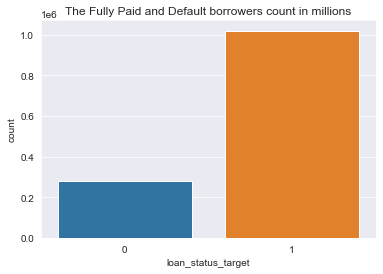

In [15]:
# examine the probability distribution of Fully Paid and Default
sns.set_style('darkgrid')
sns.countplot(data=loan2, x='loan_status_target');
          
plt.title('The Fully Paid and Default borrowers count in millions');

 Establish the target variables: Default - 0, Fully Paid - 1


In [16]:
# summary statistics of Fully Paid borrowers
loan2[loan2['loan_status_target']==1].describe()

,funded_amnt,annual_inc,loan_amnt,int_rate,installment,total_pymnt,dti,loan_status_target
count,1.019355e+06,1.019355e+06,1.019355e+06,1.019355e+06,1.019355e+06,1.019355e+06,1.019355e+06,1019355.0
mean,1.428318e+04,7.922541e+04,1.429203e+04,1.262191e+01,4.355808e+02,1.664209e+04,1.767980e+01,1.0
std,8.693672e+03,7.207638e+04,8.697699e+03,4.528396e+00,2.616266e+02,1.050457e+04,9.453407e+00,0.0
min,5.000000e+02,3.300000e+01,5.000000e+02,5.310000e+00,4.930000e+00,5.263322e+02,-1.000000e+00,1.0
25%,7.675000e+03,4.800000e+04,7.700000e+03,9.170000e+00,2.451600e+02,8.593418e+03,1.140000e+01,1.0
50%,1.200000e+04,6.700000e+04,1.200000e+04,1.221000e+01,3.724500e+02,1.406990e+04,1.703000e+01,1.0
75%,2.000000e+04,9.500000e+04,2.000000e+04,1.531000e+01,5.787000e+02,2.264532e+04,2.332000e+01,1.0
max,4.000000e+04,1.099920e+07,4.000000e+04,3.099000e+01,1.719830e+03,6.329688e+04,9.990000e+02,1.0


In [17]:
# summary statistics of Default borrowers
loan2[loan2['loan_status_target']==0].describe()

,funded_amnt,annual_inc,loan_amnt,int_rate,installment,total_pymnt,dti,loan_status_target
count,278825.000000,2.788250e+05,278825.000000,278825.000000,278825.000000,278825.000000,278825.000000,278825.0
mean,16050.919304,7.341424e+04,16058.430019,15.735223,477.976804,8604.287093,19.944061,0.0
std,8952.431438,6.886138e+04,8955.358609,4.955191,266.971080,6918.752418,10.278906,0.0
min,900.000000,3.200000e+01,900.000000,5.310000,7.610000,0.000000,0.000000,0.0
25%,9600.000000,4.500000e+04,9600.000000,12.290000,283.220000,3646.440000,13.360000,0.0
50%,15000.000000,6.200000e+04,15000.000000,15.050000,416.280000,6754.230000,19.550000,0.0
75%,21000.000000,8.700000e+04,21000.000000,18.550000,625.720000,11573.290000,26.090000,0.0
max,40000.000000,9.573072e+06,40000.000000,30.990000,1717.630000,61947.529797,999.000000,0.0


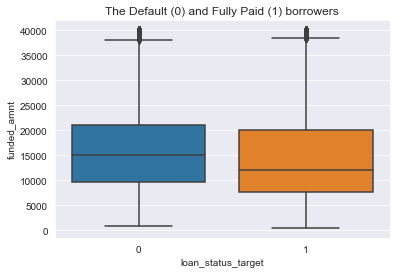

In [18]:
# what is the relationship between funded amount and loan status?
sns.boxplot(x='loan_status_target', y='funded_amnt', data=loan2);
plt.title('The Default (0) and Fully Paid (1) borrowers');

**Descriptive statistics for Fully Paid and Default**

|Description||Fully Paid(1)||Default(0)|
|:-:||:-:||:-:|
|std||8_693 ||8_952|
|min||500||900|
|mean||14_283||16_050|
|max||40_000||40_000|
|75%||20_000||21_000|
|50%||12_000||15_000|
|25%||7_675||9_600|

All the statistical values for Default are higher than Fully Paid. We examine the standard deviation and mean relationship, and noticed most of the loans are centered around the mean. More than 50% of the data is skewed upwards in Default. This could mean that those who obtain a higher loan are unable to repay.


In [19]:
# remove loan_status was replaced with loan_status_target
loan2.drop(columns=['loan_status'], inplace=True)

### Annual Income
We will evaluate annual income and remove outliers.

In [20]:
# evaluate the distribution of annual income
loan2[['annual_inc']].describe()

,annual_inc
count,1.298180e+06
mean,7.797728e+04
std,7.143791e+04
min,3.200000e+01
25%,4.800000e+04
50%,6.500000e+04
75%,9.300000e+04
max,1.099920e+07


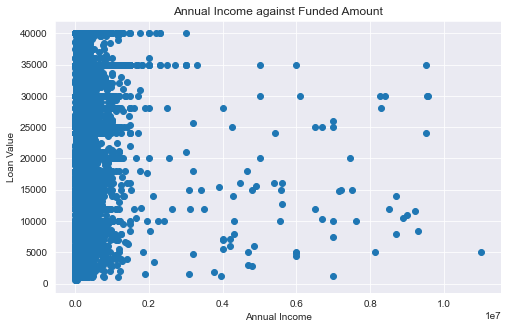

In [21]:
# examine a scatterplot for further understanding of income
plt.figure(figsize=(8,5))
plt.scatter(loan2['annual_inc'], loan2['funded_amnt'])
plt.title("Annual Income against Funded Amount")
plt.ylabel('Loan Value')
plt.xlabel('Annual Income')
plt.show()

A majority of borrowers earn less than 175_000 annually.  We will compute the upper and lower limits and remove values beyond.  This procedure is done to get a balance distribution and predictions will be more accurate.

In [22]:
#calculate IQR
Q1 = loan2.annual_inc.quantile(.25)
Q3 = loan2.annual_inc.quantile(.75)
IQR = Q3 - Q1

In [23]:
#calculate lower limit and upper limit
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit, upper_limit

(-19500.0, 160500.0)

In [24]:
# removed income over 161_000, a total of 60_171 data points
loan2.drop(loan2[loan2['annual_inc'] >161000].index, inplace = True)

The minimum annual income was 32_000.  Using the lower limit in our calculation returns a negative number and someone cannot earn less than zero.  

Borrowers who earn more than over 161_000 annually. We removed the values over the upper limit, 1.2% of the data set- a tiny amount. 


The histogram is not normally distributed. We noticed a lot of the borrowers earn income between 40k and 75k.  With the removal of upper limits, the data is skewed to the right indicating there are many borrowers with lower annual income. This imbalance will produce incorrect results, so we will use an imbalance technique before modeling.

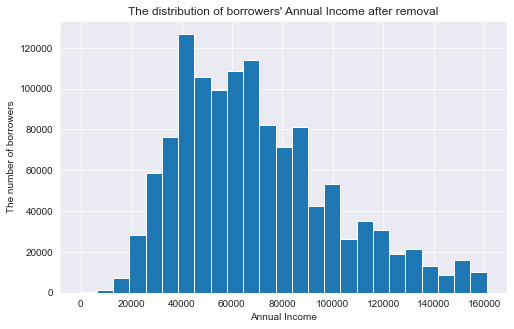

In [25]:
#A distribution of annual income after the outliers were removed.
plt.figure(figsize=(8,5))
plt.hist(loan2['annual_inc'], bins=25);
plt.xlabel('Annual Income');
plt.ylabel('The number of borrowers')
plt.title("The distribution of borrowers' Annual Income after removal");

In [26]:
#use the values in the comparison table below
loan2[['annual_inc']].describe()

,annual_inc
count,1.238009e+06
mean,6.978046e+04
std,3.071922e+04
min,3.200000e+01
25%,4.611700e+04
50%,6.500000e+04
75%,8.800000e+04
max,1.610000e+05


**Statistical values of the annual income** 

|Description||before removal||after removal|
|:-:||:-:||:-:|
|min||32||32|
|max||10_999_200||161_000|
|mean||77_977||69_780|
|75%||93_000||88_000|
|50%||65_000||65_000|
|25%||48_000||4_611|


Removing the outliers changed the statistical values.  Looking at the table above, all the values decreased as expected.  The 25  percentile decreased by 43_389 stating that borrowers below the mean has a wide spread in income.  The reduction in the mean and 75 percentile is in line to our expectation.
Although removing 1000's of data points, the median value remained the same  before and after removal.  This indicates that there are many borrowers who earn 65_000 annually. 

We were curious whose annual income was almost 11m.  The borrower lived in California (Newbury Park), had a loan of 5_000, with interest rate at 18.06 and employment of (1) year.  It is interesting to note that, of the top five earners, two default on their loans.  

In [27]:
df = loan2[loan2.annual_inc > 1000000]
df.sort_values(by=['annual_inc','loan_status_target', 'funded_amnt'],
               ascending=False)

,funded_amnt,emp_length,annual_inc,loan_amnt,home_ownership,int_rate,addr_state,grade,term,installment,total_pymnt,issue_d,purpose,dti,zip_code,loan_status_target


### Funded Amount

Funded Amount is the value of the loan.  It is the amount that the borrower place on the application.

In [28]:
# examine funded amount distribution
loan2[['funded_amnt']].describe()

,funded_amnt
count,1.238009e+06
mean,1.421706e+04
std,8.475573e+03
min,5.000000e+02
25%,8.000000e+03
50%,1.200000e+04
75%,2.000000e+04
max,4.000000e+04


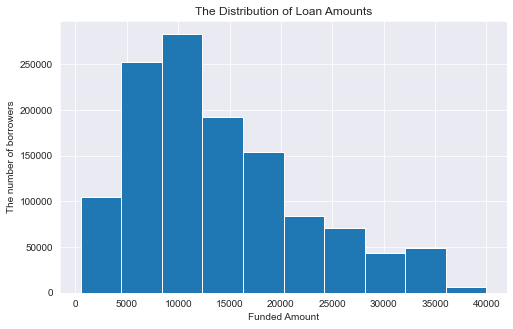

In [29]:
# loan distribution 
plt.figure(figsize=(8,5))
plt.hist(loan2['funded_amnt']);
plt.xlabel('Funded Amount');
plt.ylabel('The number of borrowers')
plt.title('The Distribution of Loan Amounts');

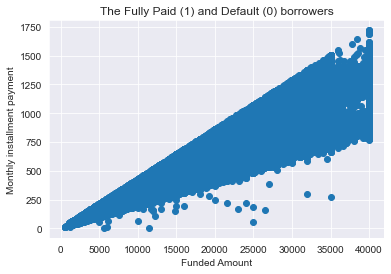

In [30]:
# scatter plot to examine the loan amount and monthly repayment
plt.scatter(loan2['funded_amnt'], loan2['installment']);
plt.title('The Fully Paid (1) and Default (0) borrowers');
plt.xlabel('Funded Amount');
plt.ylabel('Monthly installment payment');

The histogram shows that loans issued are skewed to the right.  The minimum loan issued was 500, the maximum was 40_000 and the median at 12_000.
This means median borrowers' whose annual income were 65_000 were issued loans at 12_000.  Assuming the borrowers have no other debt, the debt--in-income ratio is 18.4% (12000/65000).  No wonder borrowers default on their loans.

Lending Club uses an amortization formula(see below) which applies to both their borrowers and investors. This formula is the reason there is a line.  
A person with a lower loan amount would pay less than one at a higher loan. There are some borrowers with exceptional grade whose installment payment are further below the line. 

If a borrower for an unsecured loan at 40,000 with high interest rate, month installment of 1750 and debt to income ratio high (as calculated above), can contribute to default loan. 

- Amortization = (r/n)*P / 1 - (1 + (r/n))^-nt
- where r - interest rate, P - principal amount, n - number of months in a year, t - number of years to repay (36,60 months)

https://www.youtube.com/watch?v=FJqt8F5NB10

### Grade

"Lending Club uses a formula for their loan grade system that takes into account not only credit score, but also a combination of several indicators of credit risk from the credit report application. A rate of "A" is the highest with a value of 7 and "G" the lowest with a value of 1."
https://www.lendingclub.com/foliofn/rateDetail.action

In [31]:
# examine each categories
loan2['grade'].value_counts()

B    359666
C    355568
A    207679
D    188225
E     87990
F     30213
G      8668
Name: grade, dtype: int64

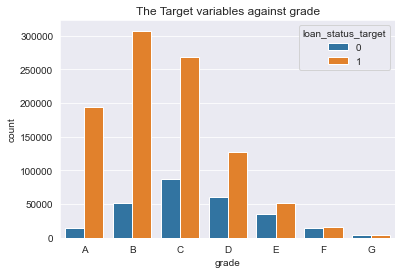

In [32]:
sns.countplot(data=loan2, x='grade', 
              hue='loan_status_target',
             order=['A', 'B', 'C', 'D', 'E', 'F', 'G']);  
plt.title('The Target variables against grade');

Each grade have defaulted loans, with "C" being the highest.  It is a no surprise because because "C" interest rate maybe 8-11%, and Lending Club add their base rate of 5%.  

According to moneycheck.com, Lending Club debt-to-ratio no more than 45% and minimum credit score of 600.  It is as if Lending Club is setting some of their borrowers to default on their loans.

In [33]:
# changing the grade from letters to numbers so we can use it in modeling
loan2['grade_clean'] = loan2['grade'].map({"A": 7,
                                    "B": 6, "C": 5, "D":4,
                                    "E":3, "F":2, "G": 1})

### Interest Rate

Lending Club interest rates take in its calculation a borrower's credit score and market condition.

In [34]:
# examine interest rate distribution
# how high is the interest rate?
loan2['int_rate'].describe()

count    1.238009e+06
mean     1.334691e+01
std      4.784614e+00
min      5.310000e+00
25%      9.910000e+00
50%      1.285000e+01
75%      1.602000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

The maximum interest rate was 30.9%, the lowest at 5.3% and median at 12.85%.  The lowest and median interest applies to those with good grade while the higher amounts to those with worst grade.

In [35]:
# where there loans issued for more than 20% interest rate?
loan2[loan2['int_rate']>20]['loan_status_target'].value_counts(normalize=True)

1    0.56329
0    0.43671
Name: loan_status_target, dtype: float64

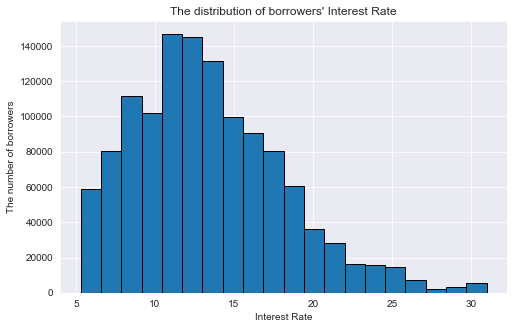

In [36]:
# # a visual of the distribution
plt.figure(figsize=(8,5))
plt.hist(loan2['int_rate'], bins=20, edgecolor='black');
plt.xlabel('Interest Rate');
plt.ylabel('The number of borrowers')
plt.title("The distribution of borrowers' Interest Rate");

43% of Default borrowers had interest rate at 20% or greater at median income of 65_000 annually and debt-to-income ratio starting at 18.5%, no wonder borrowers default.

In [37]:
#sns.countplot(data=loan2, x='int_rate', hue='loan_status_target');

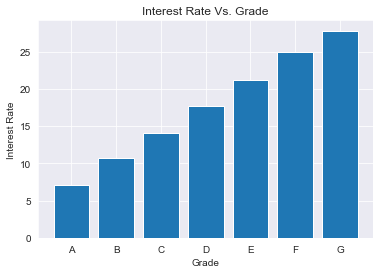

In [38]:
# is there a relationship between grade and interest rate?
interest_by_grade=loan2[['int_rate','grade']].groupby('grade').mean()
plt.bar(x=interest_by_grade.index,height=interest_by_grade['int_rate'])
plt.title('Interest Rate Vs. Grade');
plt.xlabel('Grade');
plt.ylabel('Interest Rate');

We have learned so far, a borrower grade determines the interest rate, were were not surprise to a linear connection between grade and interest rate. The riskier the grade, the interest rate is higher.

### Employment History

The length of employment feature was an object that contained strings, n/a, <, >, which were removed then it was convert to numeric.

In [39]:
# remove the strings and symbols
loan2['emp_length'] = loan2['emp_length'].map({'10+ years': 10, '9 years' : 9,
                                               '8 years': 8, 
                                              '7 years': 7,
                                              '6 years': 6,
                                              '5 years': 5,
                                              '4 years': 4,
                                              '3 years': 3,
                                              '2 years': 2,
                                              '1 year': 1, 
                                              '< year': 0})

In [40]:
# some algorithm do not accept NaN's
loan2['emp_length'] = loan2['emp_length'].fillna(0)

In [41]:
# evaluate length of employment
loan2.emp_length.value_counts(normalize=True)

10.0    0.347360
2.0     0.096297
0.0     0.086166
3.0     0.085137
1.0     0.070364
5.0     0.066509
4.0     0.063777
6.0     0.049518
8.0     0.047784
7.0     0.046930
9.0     0.040159
Name: emp_length, dtype: float64

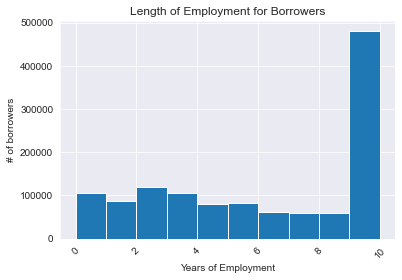

In [42]:
plt.hist(loan2['emp_length']);
plt.xticks(rotation=45)
plt.xlabel('Years of Employment');
plt.ylabel('# of borrowers');
plt.title('Length of Employment for Borrowers');

10 years is large because it includes employment of 10 years and beyond.  There were 8% of the borrowers with 0 years of employment.  How can a person with 0 years employment obtain a loan?

Text(0.5, 1.0, 'Length of Employment and Loan Status')

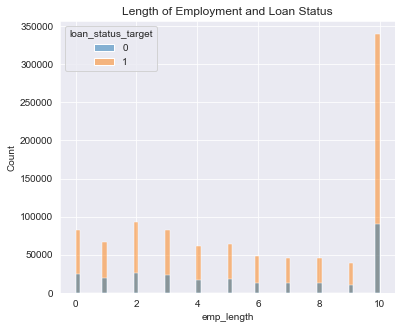

In [44]:
plt.figure(figsize=(6,5))
sns.histplot(data=loan2, x='emp_length',  
             hue='loan_status_target');
plt.title ('Length of Employment and Loan Status')

There does not seem to be a connection between employment length and default rate.  We noticed that employment length of 0 and 1 have high default rates.  Employment length of 10 has the largest default rate because this group consist of those borrowers who have been employed more than 10 years.

In [45]:
TenYears = loan2[loan2.emp_length == 10.0].copy()
Total = TenYears["funded_amnt"].count()
TotalDefaulted = TenYears["funded_amnt"][TenYears.loan_status_target == 0].count()



In [46]:
#TenYears.head(20)
TotalDefaulted
#Total
print(TotalDefaulted/Total)

0.2096782820003023


In [47]:
loan2[loan2.annual_inc > 1000000]

,funded_amnt,emp_length,annual_inc,loan_amnt,home_ownership,int_rate,addr_state,grade,term,installment,total_pymnt,issue_d,purpose,dti,zip_code,loan_status_target,grade_clean


### Term

In [48]:
#distribution of loan by terms, loan status
loan2.term.value_counts(normalize=True)

 36 months    0.749641
 60 months    0.250359
Name: term, dtype: float64

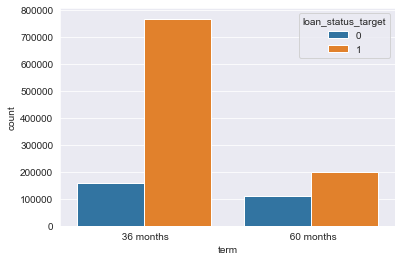

In [49]:
sns.countplot(data=loan2, x='term', hue='loan_status_target');

### Home Ownership

In [50]:
loan2['home_ownership'].value_counts()

MORTGAGE    602694
RENT        508225
OWN         126638
ANY            270
OTHER          136
NONE            46
Name: home_ownership, dtype: int64

ANY, OTHER, NONE total to less than 1% of the data so we decided to remove them and prevent "noise" they may cause in modeling.

In [51]:
loan2.drop(loan2[loan2['home_ownership']=='ANY'].index, inplace=True)
loan2.drop(loan2[loan2['home_ownership']=='OTHER'].index, inplace=True)
loan2.drop(loan2[loan2['home_ownership']=='NONE'].index, inplace=True)

In [52]:
loan2['home_ownership_clean'] = loan2['home_ownership'].map({"MORTGAGE": 1,
                                    "RENT": 3, "OWN": 2 })

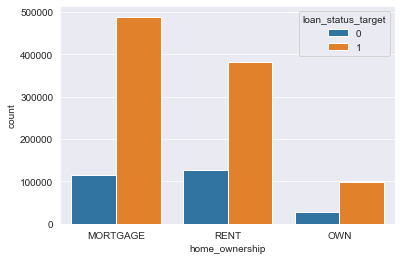

In [53]:
sns.countplot(x='home_ownership',hue='loan_status_target',
              data=loan2);

### Purpose


In [54]:
# What are the most common reasons for requesting a loan?
loan2['purpose'].value_counts(normalize=True)

debt_consolidation    0.585729
credit_card           0.218080
home_improvement      0.061277
other                 0.057664
major_purchase        0.021866
medical               0.011314
small_business        0.011313
car                   0.010948
moving                0.007082
vacation              0.006697
house                 0.005309
wedding               0.001778
renewable_energy      0.000693
educational           0.000249
Name: purpose, dtype: float64

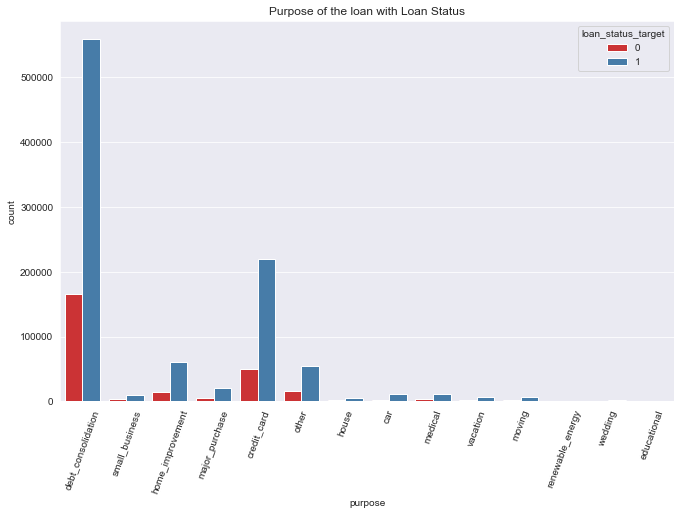

In [55]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='loan_status_target',
              data=loan2, palette='Set1');
plt.xticks(rotation=70);
plt.title('Purpose of the loan with Loan Status');

In [56]:
# remove grade and home ownership were replaced with grade_clean, home_ownership_clean
loan2.drop(columns=['grade', 'home_ownership'], inplace=True)

In [57]:
loan2.to_csv('./LoanStats/loan_model.csv')

## Models

In [58]:
model = pd.read_csv('./LoanStats/loan_model.csv')

In [59]:
# removed the Unnamed Column
model.drop(columns=['Unnamed: 0'], inplace=True)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, recall_score, classification_report
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [61]:
# https://www.programcreek.com/python/example/81623/sklearn.metrics.classification_report
def train_evaluate(algo, X_train, X_test, y_train, y_test):
    
    algo.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (algo.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (algo.score(X_test, y_test))
    
    y_pred = algo.predict(X_test)
    print ("Classification Report:")
    print (classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (confusion_matrix(y_test, y_pred))


### Set up modeling

In [62]:
# identify X and y features
X = model[['funded_amnt', 'emp_length', 'annual_inc', 'int_rate', 
            'installment', 'total_pymnt','grade_clean']]
y = model['loan_status_target']

The baseline values of the target variables.

In [63]:
y.value_counts(normalize=True)

1    0.782997
0    0.217003
Name: loan_status_target, dtype: float64

The data was split 75% train and 25% testing.

In [64]:
# split the data to perform training on train and then test for predicition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
#ss = StandardScaler()
#X_train = ss.fit_transform(X_train)
#X_test = ss.transform(X_test)

In [66]:
# verify the shape of the data
print('X train: ',X_train.shape)
print('y train: ',y_train.shape)
print()
print('X test: ',X_test.shape)
print('y test: ',y_test.shape)

X train:  (928167, 7)
y train:  (928167,)

X test:  (309390, 7)
y test:  (309390,)


### Logistic Regression

Logistic Regression is chosen as one of the models because it is used to predict a single outcome.  Since we are trying to predict if someone will default or not, that makes this is a good algorithm for this problem.

In our dataset there is a defined relationship between the features and the outcome.

I did not use sag or saga solvers because the features are not of similar scale. I removed the outliers to help improve model performance. My dataset also does not have high correlation between each feature. 

Parameters:
- class_weight: How to handle imbalance across features
- solver: tested all of them to see which performs best
- max_iter: the maximum number of iterations to get a solution (at max and no match it will stop)
- C: Smaller values have more regularization. Inverse of regularization strength. Must be positive value. Search logarithmically: [.1, 1, 10]

In [74]:
# https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451

solver_list = ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']

gs_params = {
    'solver' : solver_list,
    'C' : [.1, 1, 10],
    'max_iter': [50, 100, 200],
    'class_weight' : [None, 'balanced']
}

log_reg = LogisticRegression(n_jobs=-1, random_state=42)
clf = GridSearchCV(log_reg, gs_params, cv=5)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']


/Users/celeste/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/celeste/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/celeste/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/celeste/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  war

/Users/celeste/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/celeste/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/celeste/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/celeste/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  war

/Users/celeste/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/celeste/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/celeste/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/celeste/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  war

In [76]:
for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

print(clf.best_score_)
print(clf.best_params_)

  newton-cg 0.971
  lbfgs 0.973
  sag 0.974
  saga 0.974
  liblinear 0.974
0.9742632516712296
{'C': 0.1, 'class_weight': None, 'max_iter': 50, 'solver': 'liblinear'}


In [77]:
# instantiate the model
logreg = LogisticRegression(**clf.best_params_)


In [78]:
train_evaluate(logreg, X_train, X_test, y_train, y_test)

Accuracy on training set:
0.9742535556640131
Accuracy on testing set:
0.9739228805068038
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     67276
           1       0.97      1.00      0.98    242114

    accuracy                           0.97    309390
   macro avg       0.98      0.94      0.96    309390
weighted avg       0.97      0.97      0.97    309390

Confusion Matrix:
[[ 59383   7893]
 [   175 241939]]


Result: 
- The results of the train and test data have accuracy score of .96.  Precision score for both variables predict an average of .98 correctly a borrower will default.    
- There does appear to be an overfitting in the recall score because Fully Paid is perfect and Default is .87. 
- the False Negative result from the Confusion Matrix is concerning because it states 8415 borrowers will default when they may been a Fully Paid one.  

### KNeighbors

KNeighbors is one of the simplest and a very popular algorithm.  It calculates the distance neighbors(data points),K. The higher the K, the better the accuracy score. 
The metric use is accuracy.  

The dataset is large, we decided to use n_neighbors=7.  It is best to use an odd number for n_neighbors. kd_tree is a combination of Decision Tree and KNN. It splits the regions at the mean value of the observations calculating X and Y coordinates, then continue to do until there is one region.   The leaf size increased because the data is imbalanced.

In [ ]:
# # instantiate the model
knn = KNeighborsClassifier(n_neighbors=7, weights='distance',
                          n_jobs=-1, algorithm='kd_tree',
                          leaf_size=500)

In [ ]:
train_evaluate(knn, X_train, X_test, y_train, y_test)

Result: 
- The accuracy score for the train and test data shows that there is overfitting.  We increased the leaf_size from 400 to 500 to correct the overfit and it improved a great deal.
- The model was able to identify Fully Paid borrowers 98%  while it had a difficult time with Default.  
- The misclassification values for KNN are much lower than that of Logistic Regression.

### Random Forest Classifier

Random Forest does not have any assumptions like Logistic Regression.  It is a forest of individual trees, trained on different subset of the train data, with its own predictions and the predictions that is the majority becomes the model's prediction - usually a high accuracy score. 
Since we have a large data, we will use the following hyperparameters:
- n_estimators to increase the number of trees and prevent underfitting.  
- max_depth to increase the depth of the tree
- min_samples_leaf increase teh number of splits at each node
- max_features will take a random subset of the square root of the features to find the best split.
- max_samples helps to choose the maximum number of samples from the trainingg set to train each individual sample.  

### Ada Boost

In [ ]:
ada = AdaBoostClassifier()

ada_params = {
    'n_estimators': [50,100],
    'learning_rate': [.6, 1.0]}

gs_ada = GridSearchCV(ada, param_grid=ada_params, n_jobs=-1, cv=3)
gs_ada.fit(X_train, y_train)

In [ ]:
result_train=cross_val_score(ada,X_train,y_train,cv=10,scoring='accuracy')
result_test=cross_val_score(ada,X_test,y_test,cv=10,scoring='accuracy')

#printing the scores
print('The training score for cross validation for AdaBoost is:',result_train.max())
print('The cross validated score for cross validation for AdaBoost is:',result_test.max())

In [ ]:
plt.figure(figsize=(12, 9));

plot_confusion_matrix(gs_ada, X_test, y_test, 
                      cmap='Blues');
plt.title('Confusion matrix Using AdaBoost');

In [ ]:
target_names = ['class 1', 'class 0']
print(classification_report(y_test, y_pred, target_names=target_names))

## Imbalance SMOTE

In [ ]:
# normal the data because the scale of the values are different
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [ ]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))

In [ ]:
#SMOTE
ada.fit(X_train_res, y_train_res.ravel())
y_pred=ada.predict(X_test)
accuracy_score(y_test, y_pred)